**<h1> Exercise 1.1 </h1>**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Exercise 1.1 (a) - (c)**

In [2]:
def estimate_pi(N):
    """" Estimate pi by Monte Carlo

    N : number of random numbers to draw
    """""
    hits=0
    for _ in range(N):
        x = np.random.random(size=2)
        if np.linalg.norm(x) < 1: 
            hits+=1
            
    return hits/N * 4

In [3]:
def estimate_error(n, N):
    """" Compute sample mean and variance of error distribution

    N : number of random numbers to draw
    n : number of observations of the error distribution given N
    """""
    pilist = [estimate_pi(N) for _ in range(n)]

    errors = np.abs(np.array(pilist) - np.pi)
    mean_error = np.sum(errors)/n
    variance_error = (lambda v: np.dot(v, v))(errors - mean_error) / (n - 1)
    
    return [mean_error, variance_error]

In [4]:
n = 500
Nlist = np.arange(1000, 10000 + 1000, 1000)
error_list = np.array([estimate_error(n, N) for N in Nlist])

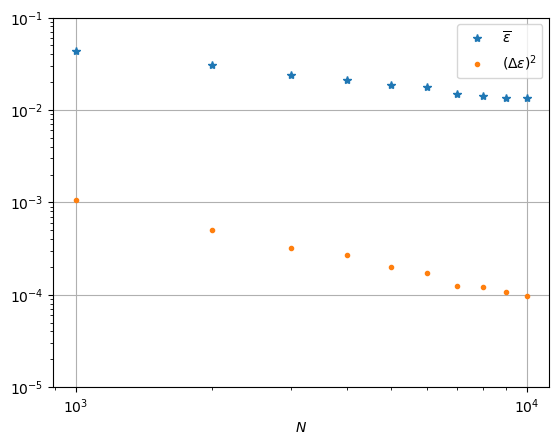

In [5]:
fig, ax = plt.subplots()
ax.plot(Nlist, error_list[:,0], '*', label="$\overline{\epsilon}$")
ax.plot(Nlist, error_list[:,1], '.', label="$(\Delta \epsilon)^2$")
plt.xscale('log')
plt.yscale('log')
plt.ylim([10**(-5),10**(-1)])
ax.set_xlabel("$N$")
ax.grid()
ax.legend()

log-log scale linear function with gradient -1/2  $\implies$  mean error $\bar{\epsilon} \sim \frac{1}{\sqrt{N}}$  <br /> <br />
log-log scale linear function with gradient -1  $\implies$  variance error $(\Delta \epsilon)^2 \sim \frac{1}{N}$

**Exercise 1.1 d)**

Volume of $d$-dimensional sphere $V_{d}(r) = V_{d} \cdot r^d$, with $V_{d} = \frac{\pi^{d/2}}{\Gamma(d/2 + 1)}$. <br /> <br />
This notebook aims to estimate the volume of a unit sphere $V_{d}$.

In [6]:
def estimate_sphere_volume(N, d):
    """" Estimate unit sphere volume by Monte Carlo

    N : Number of random numbers to draw
    d : Dimension
    """""
    hits=0
    for _ in range(N):
        x = np.random.random(size=d)
        if np.linalg.norm(x) < 1: 
            hits+=1
            
    return hits/N * 2**d

In [7]:
def estimate_error(n, N, d):
    """" Compute sample mean and variance of error distribution

    N : Number of random numbers to draw
    n : Number of observations of the error distribution given N
    d : Dimension
    """""
    volumelist = [estimate_sphere_volume(N, d) for _ in range(n)]

    errors = np.abs(np.array(volumelist) - np.pi**(d/2)/sp.special.gamma(d/2+1))
    mean_error = np.sum(errors)/n
    variance_error = (lambda v: np.dot(v, v))(errors - mean_error) / (n - 1)
    
    return [mean_error, variance_error]


In [8]:
n = 100
Nlist = np.arange(1000, 10000 + 1000, 1000)
dlist = np.arange(1, 10 + 1, 1)
error_matrix = np.array([ np.array([ estimate_error(n, N, d) for N in Nlist]) for d in dlist])

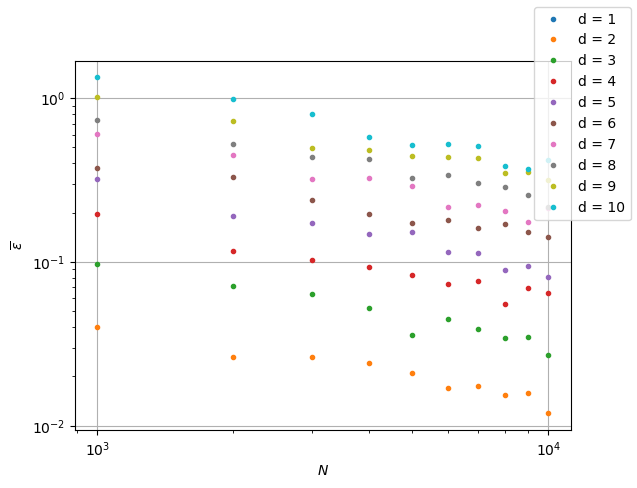

In [9]:
fig, ax = plt.subplots()
for i, d in enumerate(dlist):
    ax.plot(Nlist, error_matrix[i, :, 0], '.', label="d = %d"%d)
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel("$N$")
ax.set_ylabel("$\overline{\epsilon}$")
ax.grid()
fig.legend()

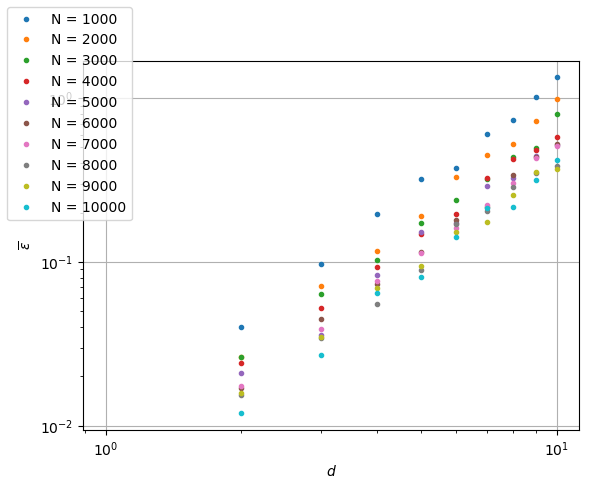

In [10]:
fig, ax = plt.subplots()
for i, N in enumerate(Nlist):
    ax.plot(dlist, error_matrix[:, i, 0], '.', label="N = %d"%N)
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel("$d$")
ax.set_ylabel("$\overline{\epsilon}$")
ax.grid()
fig.legend(loc='upper left')

log-log scale linear function with gradient -1/2  $\implies$  mean error $\bar{\epsilon} \sim \frac{1}{\sqrt{N}}$ (with $d$ fixed)   <br /> <br />
log-log scale linear function with gradient -2  $\implies$  mean error $\bar{\epsilon} \sim \frac{1}{d^2}$ (with $N$ fixed)  <br /> <br />